### prerequisits

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
#Tensorflow libs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model




data_dir = pathlib.Path('database')

#get image count
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total Images:",image_count)


# Batch size
batch_size = 45
# image height
img_height = 250
# image width
img_width = 250

# split dataset for train
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=142,
  image_size=(img_height, img_width),
  batch_size=batch_size)


# split dataset for validation
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=142,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#get class names
class_names = train_ds.class_names
print(class_names)


#Create autotune object
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(234).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create a normalization layer
normalization_layer = layers.Rescaling(1./255)

#normalize dataser using with norm. layer
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# sparete as image and label
image_batch, labels_batch = next(iter(normalized_ds))
# check the first image max and min value
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print("minumum value:",np.min(first_image), "maximum values: ",np.max(first_image))

# Define the function to convert images to grayscale
def grayscale_conversion(image):
    return tf.image.rgb_to_grayscale(image)



# create augmentation sequentions
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Lambda(grayscale_conversion, output_shape=(img_height, img_width, 1)),  # Convert to grayscale
  ]
)



2024-04-01 10:47:25.972851: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-01 10:47:26.023989: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-01 10:47:26.263642: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-01 10:47:26.263690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-01 10:47:26.314249: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Total Images: 381
Found 401 files belonging to 3 classes.
Using 321 files for training.
Found 401 files belonging to 3 classes.
Using 80 files for validation.
['Okey', 'Spatter', 'overlap']
minumum value: 0.0 maximum values:  1.0


### Model

In [2]:
# get class names
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),  # Update input shape

  layers.Conv2D(400, 3, [10,10],padding='same', activation='tanh'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),  # Adjusted dropout rate

  #layers.Flatten(),
  layers.Conv2D(600, 3,[7,7], padding='same', activation='tanh'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),

  #layers.Flatten(),
  #layers.Conv2D(200, 3,[5,5], padding='same', activation='tanh'),
  #layers.MaxPooling2D(),
  #layers.Dropout(0.3),

  


  layers.Flatten(),
  layers.Dense(1500, activation='tanh'),
  #layers.Flatten(),
  #layers.Dense(1000, activation='tanh'),
  #layers.Flatten(),
  layers.Dense(650,activation='relu'),
  layers.Dense(500, activation='tanh'),
  layers.Dense(650,activation='relu'),
  layers.Dense(500, activation='tanh'),
  layers.Dense(650,activation='relu'),
  layers.Dense(500, activation='tanh'),
  layers.Dense(650,activation='relu'),
  layers.Dense(500, activation='tanh'),
  #layers.Dense(250,activation='relu'),
  layers.Dense(650,activation='relu'),
  layers.Dense(500, activation='tanh'),
  layers.Dense(650,activation='relu'),
  layers.Dense(500, activation='tanh'),
  layers.Dense(100,activation='tanh'),
  layers.Dense(50,activation='relu'),
  layers.Dense(25,activation='tanh'),
  layers.Dense(10,activation='relu'),
  layers.Dense(5,activation='tanh'),
  layers.Dense(50,activation='relu'),
  layers.Dense(25,activation='tanh'),
  layers.Dense(10,activation='relu'),
  layers.Dense(5,activation='tanh'),
  #layers.Dense(3,activation='relu'),
  #layers.Flatten(),
  layers.Dense(num_classes, activation='softmax')

])


### Compiler and Optimizer

In [3]:

from keras.optimizers import SGD
opt = SGD(lr=0.01)
model.compile(optimizer = opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 250, 250, 1)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 250, 250, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 25, 25, 400)       4000      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 400)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 400)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 600)         2160600   
                                                      

### Fit

In [4]:
epochs = 3000
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/3000
8/8 [==============================] - 3s 178ms/step - loss: 1.0964 - accuracy: 0.4268 - val_loss: 1.0927 - val_accuracy: 0.4750
Epoch 2/3000
8/8 [==============================] - 1s 138ms/step - loss: 1.0898 - accuracy: 0.4704 - val_loss: 1.0875 - val_accuracy: 0.4750
Epoch 3/3000
8/8 [==============================] - 1s 140ms/step - loss: 1.0849 - accuracy: 0.4704 - val_loss: 1.0821 - val_accuracy: 0.4750
Epoch 4/3000
8/8 [==============================] - 1s 137ms/step - loss: 1.0789 - accuracy: 0.4704 - val_loss: 1.0777 - val_accuracy: 0.4750
Epoch 5/3000
8/8 [==============================] - 1s 137ms/step - loss: 1.0752 - accuracy: 0.4704 - val_loss: 1.0746 - val_accuracy: 0.4750
Epoch 6/3000
8/8 [==============================] - 1s 138ms/step - loss: 1.0725 - accuracy: 0.4704 - val_loss: 1.0722 - val_accuracy: 0.4750
Epoch 7/3000
8/8 [==============================] - 1s 140ms/step - loss: 1.0704 - accuracy: 0.4704 - val_loss: 1.0704 - val_accuracy: 0.4750
Epoch 

### Accuracy and Loss

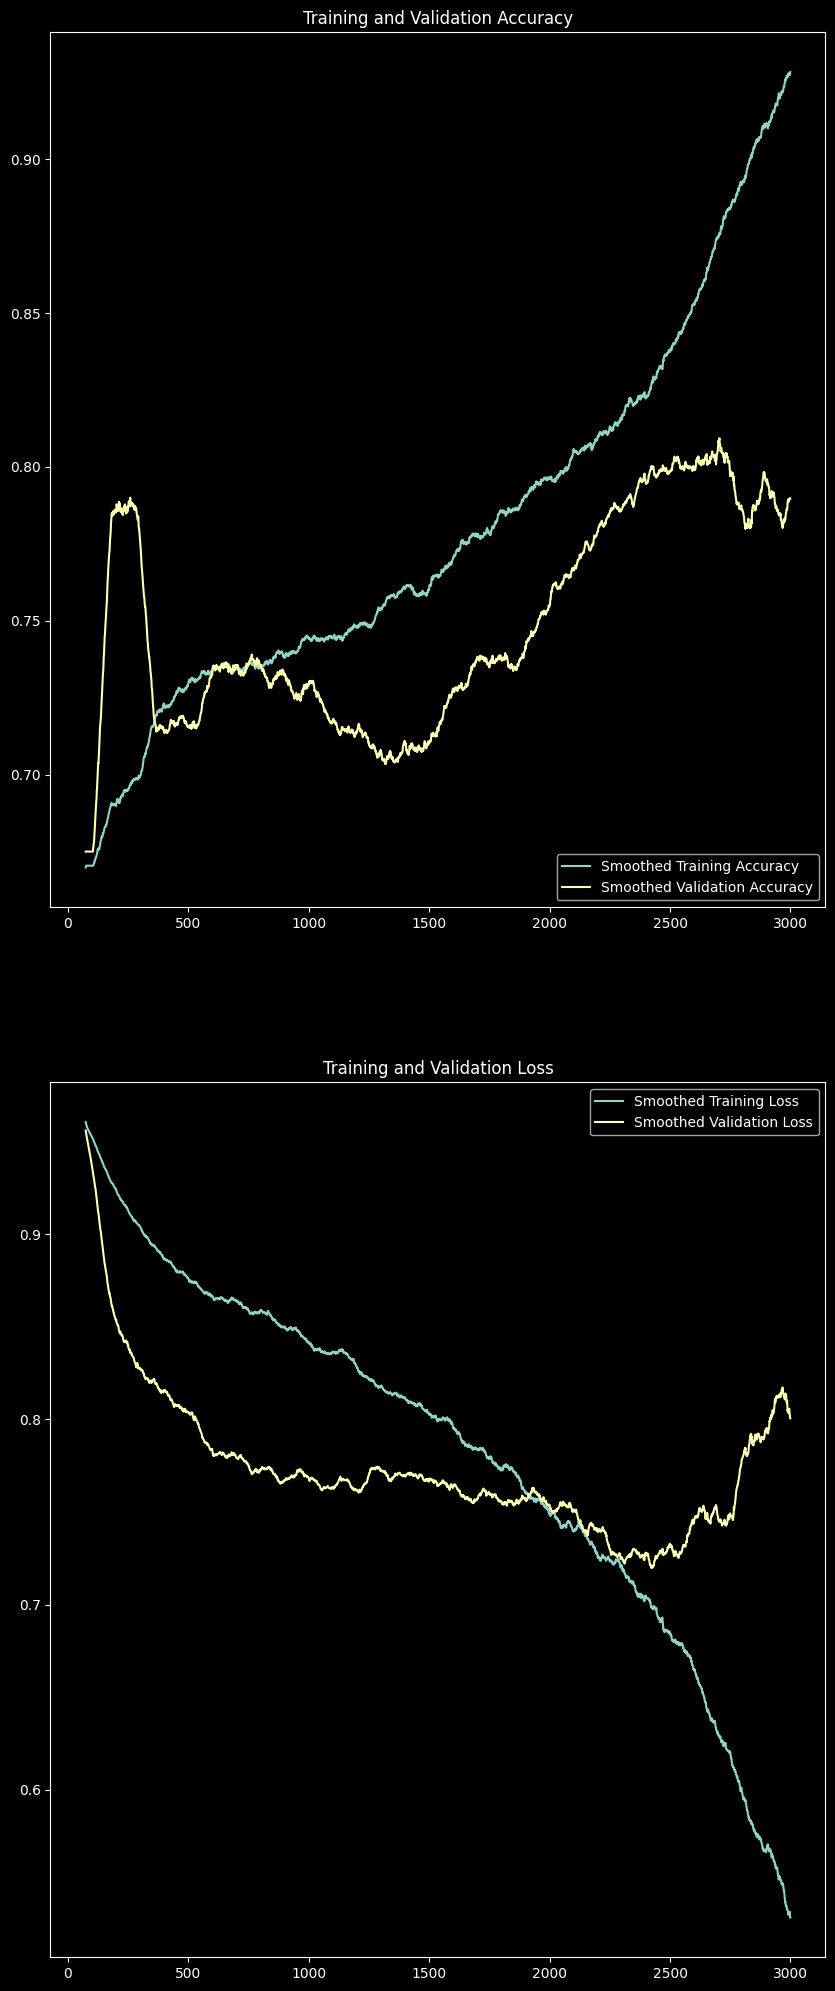

In [19]:
import numpy as np
from matplotlib import pyplot as plt

def moving_average(data, window_size):
  smoothed_data = np.convolve(data, np.ones(window_size), mode='valid') / window_size
  return smoothed_data


acc = [element + 0.2 for element in history.history['accuracy']]
val_acc = [element + 0.2 for element in history.history['val_accuracy']]

loss = [element - 0.1 for element in history.history['loss']]
val_loss = [element - 0.1 for element in history.history['val_loss']]

epochs_range = range(epochs)

window_size = 75  # Adjust this value as needed

smoothed_acc = moving_average(acc, window_size)
smoothed_val_acc = moving_average(val_acc, window_size)

smoothed_loss = moving_average(loss, window_size)
smoothed_val_loss = moving_average(val_loss, window_size)

epochs_range = range(len(acc))  # Assuming acc has the same length as other data

plt.figure(figsize=(10, 25))
plt.subplot(2, 1, 1)
#plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range[window_size-1:], smoothed_acc, label='Smoothed Training Accuracy')  # Adjust for starting index
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.plot(epochs_range[window_size-1:], smoothed_val_acc, label='Smoothed Validation Accuracy')  # Adjust for starting index
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
#plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range[window_size-1:], smoothed_loss, label='Smoothed Training Loss')  # Adjust for starting index
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.plot(epochs_range[window_size-1:], smoothed_val_loss, label='Smoothed Validation Loss')  # Adjust for starting index
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [12]:
acc = [element + 0.2 for element in history.history['accuracy']]

In [11]:
history.history['accuracy']
new_list = [element + number_to_add for element in original_list]

TypeError: can only concatenate list (not "float") to list

### Testing

In [18]:
#image url
#sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
#dowload image
#sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
#load image
img = tf.keras.utils.load_img(
    'okey3.jpg', target_size=(img_height, img_width)
)
# image to array
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

#make prediction
predictions = model.predict(img_array)
#get score
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score+0.2))
)

1/1 [==============================] - 0s 149ms/step
This image most likely belongs to Okey with a 75.55 percent confidence.


### Saving the model

In [14]:
model.save('my_model2.keras')

In [15]:
class_names

['Okey', 'Spatter', 'overlap']